# Prepare Data for Hydrus-1D

In [92]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
glob.os.getcwd()

'C:\\Users\\Robert\\Desktop\\robert_sherwood'

In [111]:
glob.os.chdir('..\AGRON 935')

In [112]:
glob.os.getcwd()
glob.os.listdir()

['Book1.xlsx',
 'Evaporation.csv',
 'TRIM parameters.txt',
 'Valley Sub raw .csv',
 'Valley Sub raw.txt',
 'Valley Sub.txt',
 'VS, CA 1']

In [113]:
Evap_data = pd.read_csv('Evaporation.csv', sep = '\t')
df = pd.DataFrame(Evap_data)

In [114]:
df.head(5)

,Date,Unnamed: 1,Time,Unnamed: 3,Step,Unnamed: 5,Mass (g),Uair (kPa),Notes
0,5/22/2019,6:03:17 PM,Before Test,0.0,1.0,Enter comment,NaN,NaN,NaN
1,5/22/2019,6:04:17 PM,Before Test,0.0,1.0,Enter comment,NaN,NaN,NaN
2,5/22/2019,6:04:49 PM,Before Test,0.0,1.0,Enter comment,NaN,NaN,NaN
3,5/22/2019,6:04:59 PM,Before Test,0.0,1.0,Enter comment,NaN,NaN,NaN
4,5/22/2019,6:05:09 PM,Before Test,0.0,0.0,Enter comment,NaN,NaN,NaN


In [115]:
df = df.drop(columns=['Step','Unnamed: 5','Mass (g)','Uair (kPa)','Notes'])
df['Mass'] = df['Unnamed: 3']
df['Datetime'] = pd.to_datetime(df['Date'] + " " + df['Unnamed: 1'])
df['Delta_time'] = df.Datetime-df.Datetime[0]

In [124]:
df.Delta_time

0     0 days 00:00:00
1     0 days 00:01:00
2     0 days 00:01:32
3     0 days 00:01:42
4     0 days 00:01:52
            ...      
103   5 days 10:05:30
104   5 days 11:45:30
105   5 days 13:25:31
106   5 days 15:05:31
107   5 days 16:45:31
Name: Delta_time, Length: 108, dtype: timedelta64[ns]

In [125]:
pd.to_datetime(df.Delta_time)

C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  """Entry point for launching an IPython kernel.


0     1970-01-01 00:00:00
1     1970-01-01 00:01:00
2     1970-01-01 00:01:32
3     1970-01-01 00:01:42
4     1970-01-01 00:01:52
              ...        
103   1970-01-06 10:05:30
104   1970-01-06 11:45:30
105   1970-01-06 13:25:31
106   1970-01-06 15:05:31
107   1970-01-06 16:45:31
Name: Delta_time, Length: 108, dtype: datetime64[ns]

TypeError: Cannot cast scalar from dtype('float64') to dtype('<m8[ns]') according to the rule 'same_kind'

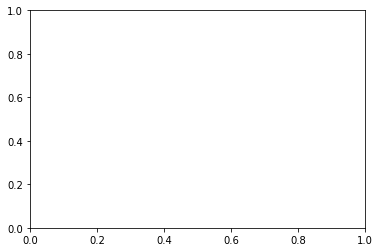

In [122]:
#plt.scatter(df.Delta_time.values, np.absolute(df.Mass))
plt.scatter(X, np.absolute(df.Mass))
plt.ylabel('Mass (g)')
plt.xlabel('Time (Days HH:MM:SS)')
plt.xlim(df['Datetime'].min(), df['Datetime'].max())
plt.show()

In [109]:
df['Delta_time'] = df.Datetime-df.Datetime[0]
df

,Date,Unnamed: 1,Time,Unnamed: 3,Mass,Datetime,Delta_time
0,5/22/2019,6:03:17 PM,Before Test,0.00,0.00,2019-05-22 18:03:17,0 days 00:00:00
1,5/22/2019,6:04:17 PM,Before Test,0.00,0.00,2019-05-22 18:04:17,0 days 00:01:00
2,5/22/2019,6:04:49 PM,Before Test,0.00,0.00,2019-05-22 18:04:49,0 days 00:01:32
3,5/22/2019,6:04:59 PM,Before Test,0.00,0.00,2019-05-22 18:04:59,0 days 00:01:42
4,5/22/2019,6:05:09 PM,Before Test,0.00,0.00,2019-05-22 18:05:09,0 days 00:01:52
...,...,...,...,...,...,...,...
103,5/28/2019,4:08:47 AM,Before Test,-0.41,-0.41,2019-05-28 04:08:47,5 days 10:05:30
104,5/28/2019,5:48:47 AM,Before Test,-0.41,-0.41,2019-05-28 05:48:47,5 days 11:45:30
105,5/28/2019,7:28:48 AM,Before Test,-0.42,-0.42,2019-05-28 07:28:48,5 days 13:25:31
106,5/28/2019,9:08:48 AM,Before Test,-0.42,-0.42,2019-05-28 09:08:48,5 days 15:05:31


In [106]:
Time_Data = df.Datetime.values
pd.Timestamp?
#Time_Data = pd.Timestamp(df.Datetime)

Init signature:
pd.Timestamp(
    ts_input=<object object at 0x000000F611F3DDB0>,
    freq=None,
    tz=None,
    unit=None,
    year=None,
    month=None,
    day=None,
    hour=None,
    minute=None,
    second=None,
    microsecond=None,
    nanosecond=None,
    tzinfo=None,
)
Docstring:     
Pandas replacement for python datetime.datetime object.

Timestamp is the pandas equivalent of python's Datetime
and is interchangeable with it in most cases. It's the type used
for the entries that make up a DatetimeIndex, and other timeseries
oriented data structures in pandas.

Parameters
----------
ts_input : datetime-like, str, int, float
    Value to be converted to Timestamp.
freq : str, DateOffset
    Offset which Timestamp will have.
tz : str, pytz.timezone, dateutil.tz.tzfile or None
    Time zone for time which Timestamp will have.
unit : str
    Unit used for conversion if ts_input is of type int or float. The
    valid values are 'D', 'h', 'm', 's', 'ms', 'us', and 'ns'. For
    ex

In [93]:
fit_data = stats.linregress(df.Datetime, np.absolute(df.Mass))

TypeError: ufunc add cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')